# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

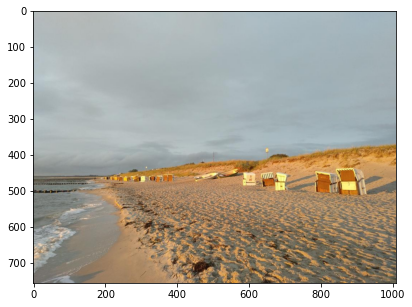

In [116]:
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

[196 152 107]


(<matplotlib.axes._subplots.AxesSubplot at 0x15028852d90>,
 <matplotlib.image.AxesImage at 0x1502db80e20>)

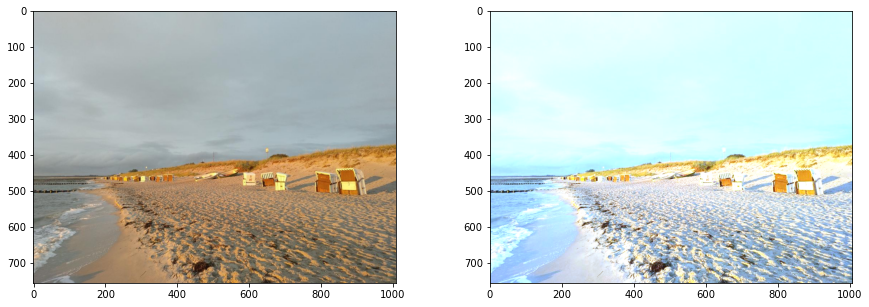

In [149]:
# Define white patch and the coefficients
row, col = 485, 594 
white = img[row, col, :]
coeffs = 255.0 / white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced / 255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<matplotlib.axes._subplots.AxesSubplot at 0x150237eefd0>,
 <matplotlib.image.AxesImage at 0x15025632d00>)

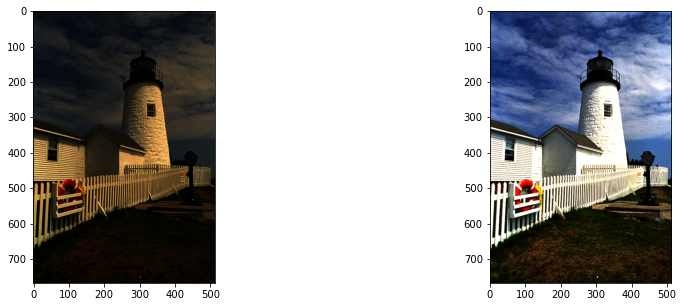

In [120]:
# Load your image
img = cv2.imread('../data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_colors = cv2.mean(img)
mean_r = mean_colors[0]
mean_g = mean_colors[1]
mean_b = mean_colors[2]

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 127.0 / mean_r
kg = 127.0 / mean_g
kb = 127.0 / mean_b
coeffs = [kr, kg, kb]

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced / 255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<matplotlib.axes._subplots.AxesSubplot at 0x1501ab48d00>,
 <matplotlib.image.AxesImage at 0x150255176a0>)

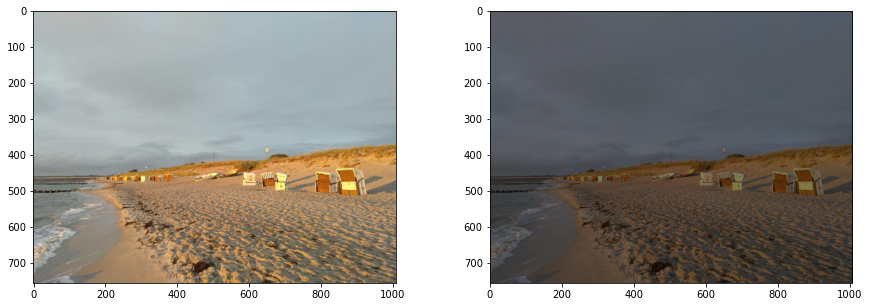

In [122]:
# Load your image
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = img[:,:,0].max()
max_g = img[:,:,1].max()
max_b = img[:,:,2].max()

kr = 127.0 / max_r
kg = 127.0 / max_g
kb = 127.0 / max_b

coeffs = [kr, kg, kb]

# # Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced / 255
balanced[balanced > 1] = 1    
    
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

# Висновки

В даній лабораторній роботі розглянуто 3 алгоритми балансування кольорів і кожен з них повертає різні ефекти:
- **White patch** - алгоритм, який принаймні в даній реалізації, потребує вчителя, який би задав новий білий колір. Гіпоретично даний алгоритм може замінити обидва інші варіанти (або знайти піксель зі всіма максимальними значеннями по каналам або вгадувати піксель з приблизним середнім сірим коліром). Даним алгоритмом можна виконати навіть інвертування зоображення, хоча такий процес також важко керувати. Можна застосувати до всіх типів зображень, але з розумом.
- **Scale-by-max** - алгоритм, який нормалізує відносно максимальних значень по 3-х каналів і в основному зоображення буде затемнюватись. Рекомендовано застосувати до занадто ярких і світлих зображень.
- **Gray world** - на мою думку, цей алгоритм найбільш універсальний з цих 3х алгоритмів, якщо вважати, що більшість зображень кольорові, адже цей алгоритм погано впливає на чорно-білі зображення і робить деталі менш помітними. Але для кольорових зображень світлі - затемнюються, темні - висвітлюються.  